In [36]:
#CONTENTS LIST
#1. Data Cleaning

#2. The Elbow Technique

#3. K-means Clustering
#   Scatterplots    

#4. Descriptive Statistics 

#5. Conclusion of Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
path=r"C:\Users\HP\03-2024 Gun Violence"

In [3]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/6/24

#Description: Importing of Project 6 Sex Grouped Date Separated.csv
"""

gun_vio =pd.read_csv(os.path.join(path,"02 Data","Prepared Data","Project 6 Sex Grouped Date Separated.csv"),index_col= False)

In [4]:
%matplotlib inline

In [5]:
gun_vio.head()

,incident_id,date,state,city_or_county,address_of_incident,count_killed,count_of_injured,congressional_district,gun_stolen,gun_type,...,participant_relationship,participant_status,participant_involvement,state_house_district,state_senate_district,Male Participants,Female Participants,Month of Incident,Day of Incident,Year of Incident
0,461105,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14,NaN,NaN,...,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,3,1,1,1,2013
1,460726,1/1/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,43,NaN,NaN,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1,0,1,1,2013
2,478855,1/1/2013,Ohio,Lorain,1776 East 28th Street,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,5,0,1,1,2013
3,478925,1/5/2013,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6,NaN,NaN,...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,3,1,1,5,2013
4,478959,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,2,2,1,7,2013


In [6]:
gun_vio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227733 entries, 0 to 227732
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   incident_id               227733 non-null  int64  
 1   date                      227733 non-null  object 
 2   state                     227733 non-null  object 
 3   city_or_county            227733 non-null  object 
 4   address_of_incident       211686 non-null  object 
 5   count_killed              227733 non-null  int64  
 6   count_of_injured          227733 non-null  int64  
 7   congressional_district    227733 non-null  int64  
 8   gun_stolen                128283 non-null  object 
 9   gun_type                  128301 non-null  object 
 10  incident_details          227411 non-null  object 
 11  latitude                  227723 non-null  float64
 12  location_description      39581 non-null   object 
 13  longitude                 227723 non-null  f

In [7]:
# Create a data frame with just the columns needed
gun_vio_df = gun_vio[['incident_id','count_killed', 'congressional_district', 'count_of_injured', 'guns_count_involved', 'Month of Incident', 'Year of Incident']]

In [8]:
gun_vio_df.head()

,incident_id,count_killed,congressional_district,count_of_injured,guns_count_involved,Month of Incident,Year of Incident
0,461105,0,14,4,NaN,1,2013
1,460726,1,43,3,NaN,1,2013
2,478855,1,9,3,2.0,1,2013
3,478925,4,6,0,NaN,1,2013
4,478959,2,6,2,2.0,1,2013


In [9]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/6/24

#Description: Data Cleaning
"""

# Check for missing values
gun_vio_df.isnull().sum()

incident_id                   0
count_killed                  0
congressional_district        0
count_of_injured              0
guns_count_involved       99432
Month of Incident             0
Year of Incident              0
dtype: int64

In [10]:
gun_vio_df = gun_vio_df[gun_vio_df["guns_count_involved"].isnull() == False]

In [11]:
gun_vio_df['guns_count_involved']=gun_vio_df['guns_count_involved'].astype('int')

In [12]:
gun_vio_df.isnull().sum()

incident_id               0
count_killed              0
congressional_district    0
count_of_injured          0
guns_count_involved       0
Month of Incident         0
Year of Incident          0
dtype: int64

In [13]:
dups = gun_vio_df.duplicated()

In [14]:
dups

2         False
4         False
6         False
10        False
11        False
          ...  
227728    False
227729    False
227730    False
227731    False
227732    False
Length: 128301, dtype: bool

In [15]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/6/24

#Description: Elbow Technique
"""

# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [16]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(gun_vio_df).score(gun_vio_df) for i in range(len(kmeans))] 

score

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

[-7267676556492800.0,
 -2076203256562498.0,
 -915533541899326.2,
 -563837045128420.5,
 -357702245829403.56,
 -255919886376117.4,
 -182552610809913.4,
 -141629080156184.88,
 -105472359499966.9]

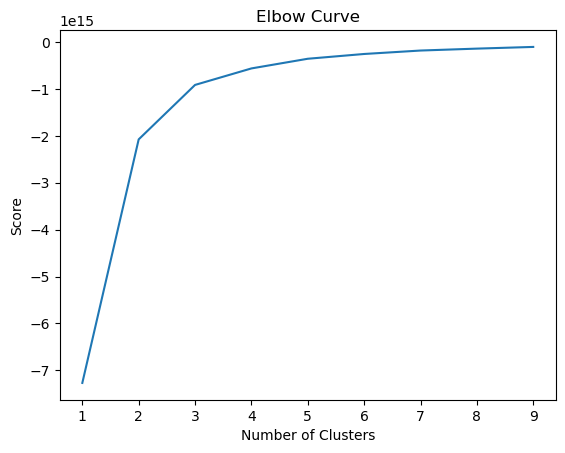

In [17]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [18]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/6/24

#Description: k-means clustering
"""

# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data

kmeans.fit(gun_vio_df)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [20]:
gun_vio_df['clusters'] = kmeans.fit_predict(gun_vio_df)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
gun_vio_df.head()

,incident_id,count_killed,congressional_district,count_of_injured,guns_count_involved,Month of Incident,Year of Incident,clusters
2,478855,1,9,3,2,1,2013,1
4,478959,2,6,2,2,1,2013,1
6,479363,5,1,0,2,1,2013,1
10,491674,1,3,3,1,1,2013,1
11,479413,1,1,3,1,1,2013,1


In [22]:
# Check frequency of each value in the clusters column

gun_vio_df['clusters'].value_counts()

clusters
0    51064
2    46873
1    30364
Name: count, dtype: int64

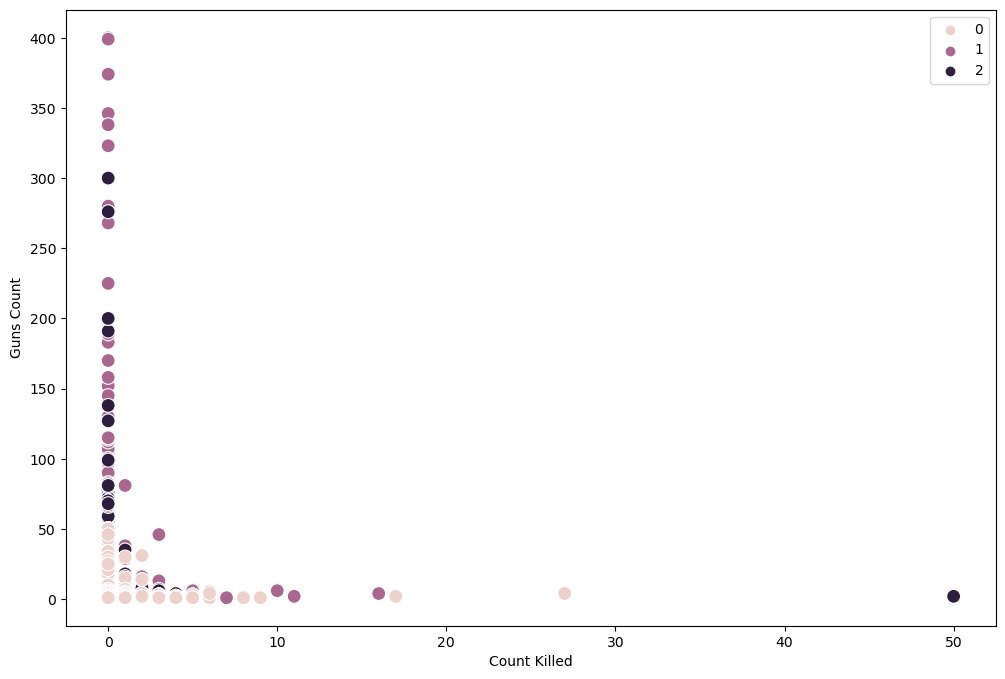

In [23]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/6/24

#Description: Scatterplots
"""

# Plot the clusters for the count_killed and congressional_district variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=gun_vio_df['count_killed'], y=gun_vio_df['guns_count_involved'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Count Killed') # Label x-axis.
plt.ylabel('Guns Count') # Label y-axis.
plt.show()

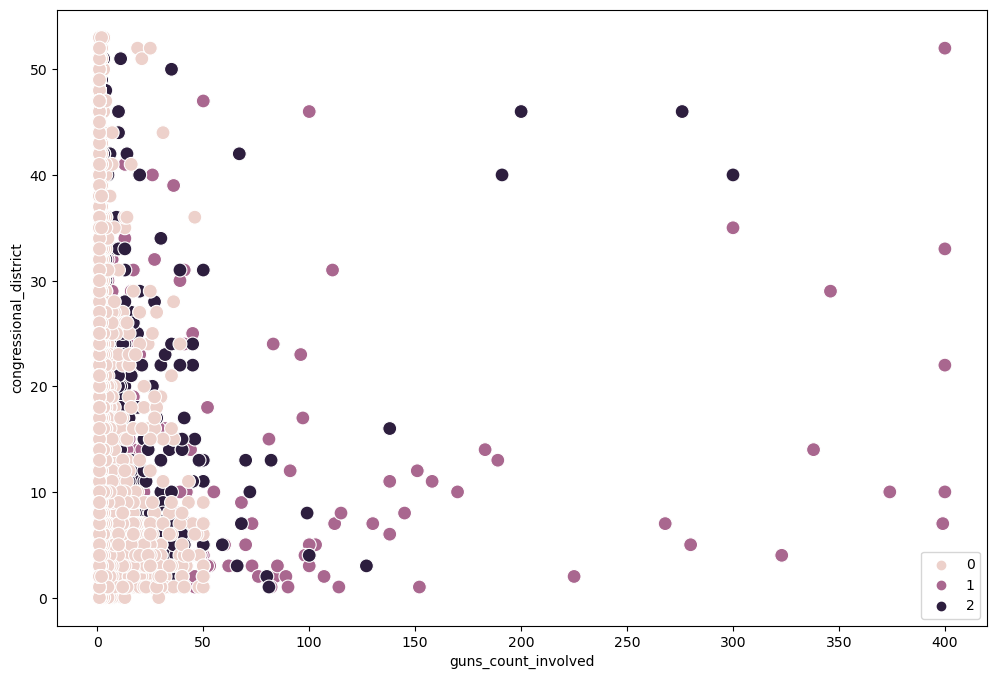

In [31]:
# Plot the clusters for the count_killed and Year of Incident variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=gun_vio_df['guns_count_involved'], y=gun_vio_df['congressional_district'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('guns_count_involved') 
plt.ylabel('congressional_district') 
plt.show()

In [32]:
# There is variability in guns count across congressional districts and the guns count involved is not showing a connection
# to congressional district. 

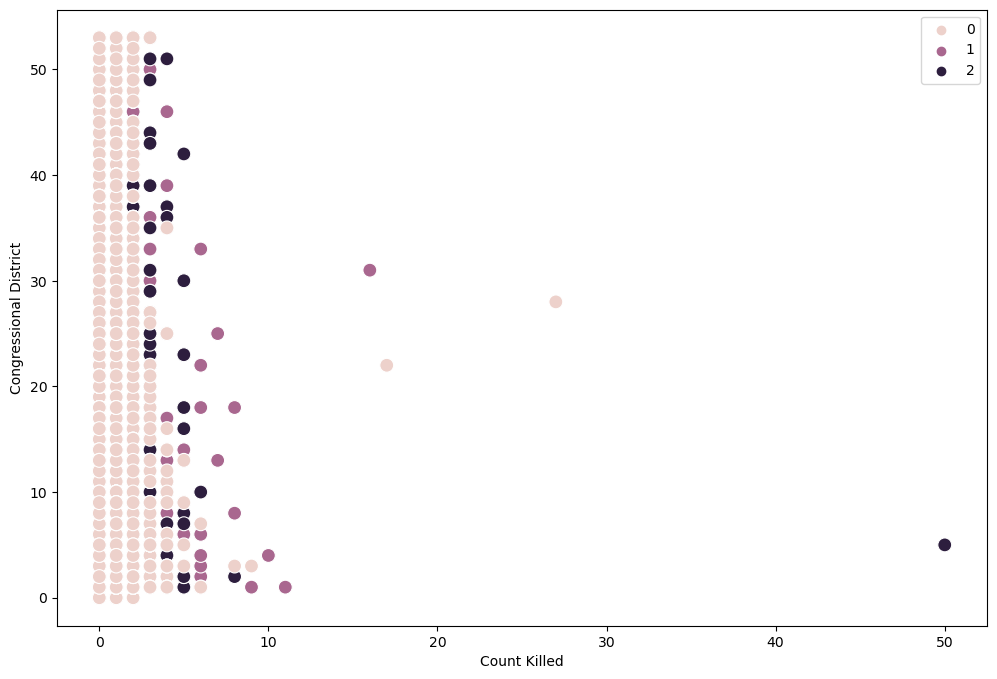

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=gun_vio_df['count_killed'], y=gun_vio_df['congressional_district'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Count Killed') 
plt.ylabel('Congressional District') 
plt.show()

In [33]:
#Casualties from gun violence occur across all congressional regions.

In [27]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/6/24

#Description: Descriptive statistics
"""

gun_vio_df.loc[gun_vio_df['clusters'] == 2, 'cluster'] = 'dark purple'
gun_vio_df.loc[gun_vio_df['clusters'] == 1, 'cluster'] = 'purple'
gun_vio_df.loc[gun_vio_df['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
gun_vio_df.groupby('cluster').agg({'guns_count_involved':['mean', 'median'], 
                         'count_killed':['mean', 'median'], 
                         'congressional_district':['mean', 'median']})

guns_count_involved        count_killed         \
                           mean median         mean median   
cluster                                                      
dark purple            1.347983    1.0     0.235850    0.0   
pink                   1.250000    1.0     0.257324    0.0   
purple                 1.658082    1.0     0.231788    0.0   

            congressional_district         
                              mean median  
cluster                                    
dark purple               8.108890    5.0  
pink                      7.830840    5.0  
purple                    8.254281    6.0

In [29]:
# Based on the statistics the dark purple cluster is the most diverse. The purple cluster is the most consistent overall, 
# revealing the smallest differences between the mean and median values. The pink cluster has the most variablilty across 
# indicators and shows the biggest differences across indicators.

In [35]:
"""
File: gun_vio_regress.pkl
Author:Erica Henry
Date: 04/6/24

#Description: Conclsuion
"""

# These results show that the count killed from gun violence incidents is not related to the guns count involved per incident.
# The results confirm that there is a connection between the frequency of deaths resulting from gun violence incidents and 
# the congressional district, and also shows that there are casualties from gun violence occurring nationwide. Also, there is 
# variability in guns count across congressional districts.

# At the onset it seemed that exploring guns count involved with the variables of count killed and congressional district 
# would reveal some hidden insights/ connections. Further analysis of qualitative variables would be helpful as part of next steps.
# Further analyses incorporporating gender, time variables, and research on the areas most affected would be usecful as well.

'\nFile: gun_vio_regress.pkl\nAuthor:Erica Henry\nDate: 04/6/24\n\n#Description: Conclsuion\n'